<h1> Welcome to Data Wrangling Class! </h1>
<h2>This notebook will provide a analysis through the Titanic Disaster to understand the Survivors patterns</h2><br>

We will handle with data (transform, missings, manipulation), explore the data (descritive and visual).

# Table of Contents:

**1. Introduction** <br>
**2. Librarys** <br>
**3. Knowning the data** <br>
**4. Exploring some Variables** <br>
**4.1  Non-interactive data visualizations**<br>
**4.2 Catagory to Numaric values**<br>
**5. Descriptive statistics**<br>
**6. Correlation analysis**<br>


<a id="Introduction"></a> <br> 
# **1. Introduction:** 
<h3> The data have 891 entries on train dataset and 418 on test dataset</h3>
- 10 columns in train_csv and 9 columns in train_test


<h2>Description of Disaster (As our lab deals wit Hazards and Disasters): </h2>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will do the analysis of what sorts of people were likely to survive.

<h3>Data Dictionary</h3><br>
Variable	Definition	Key<br>
<b>survival</b>	Survival	0 = No, 1 = Yes<br>
<b>pclass</b>	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<br>
<b>sex</b>	Sex	<br>
<b>Age</b>	Age in years	<br>
<b>sibsp</b>	# of siblings / spouses aboard the Titanic	<br>
<b>parch</b>	# of parents / children aboard the Titanic	<br>
<b>ticket</b>	Ticket number	<br>
<b>fare</b>	Passenger fare	<br>
<b>cabin</b>	Cabin number	<br>
<b>embarked	</b>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>
<h3>Variable Notes</h3><br>
<b>pclass: </b>A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>
<b>age: </b>Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>
<b>sibsp:</b> The dataset defines family relations in this way...<br>
- <b>Sibling </b>= brother, sister, stepbrother, stepsister<br>
- <b>Spouse </b>= husband, wife (mistresses and fiancés were ignored)<br>

<b>parch: </b>The dataset defines family relations in this way...<br>
- <b>Parent</b> = mother, father<br>
- <b>Child </b>= daughter, son, stepdaughter, stepson<br>

Some children travelled only with a nanny, therefore parch=0 for them.<br>

<a id="Librarys"></a> <br> 
# **2. Librarys:** 

In [1]:
#This librarys is to work with matrices
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
from sklearn.preprocessing import OneHotEncoder 
# for OneHotEncoder

# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size 
rcParams['figure.figsize'] = 10,8

In [2]:
# Importing train dataset
df_train = pd.read_csv("train.csv")

# Importing test dataset
df_test = pd.read_csv("test.csv")

<a id="Known"></a> <br> 
# **3. First look at the data:** 

We will start looking the type and informations of the datasets

In [3]:
#Looking data format and types
print(df_train.info())

# printing test info()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [4]:
#Some Statistics
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#Take a look at the data
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<a id="Known"></a> <br> 
# **4. Exploring the data (Non-interactive data visualizations ,) :** 

<h2>We will start the data analysis by the Name column

In [7]:
#Looking how the data is and searching for a re patterns
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

# **4.1  Non-interactive data visualizations**
# Non-interactive data visualizations are static and simple, such as pie or bar charts. 

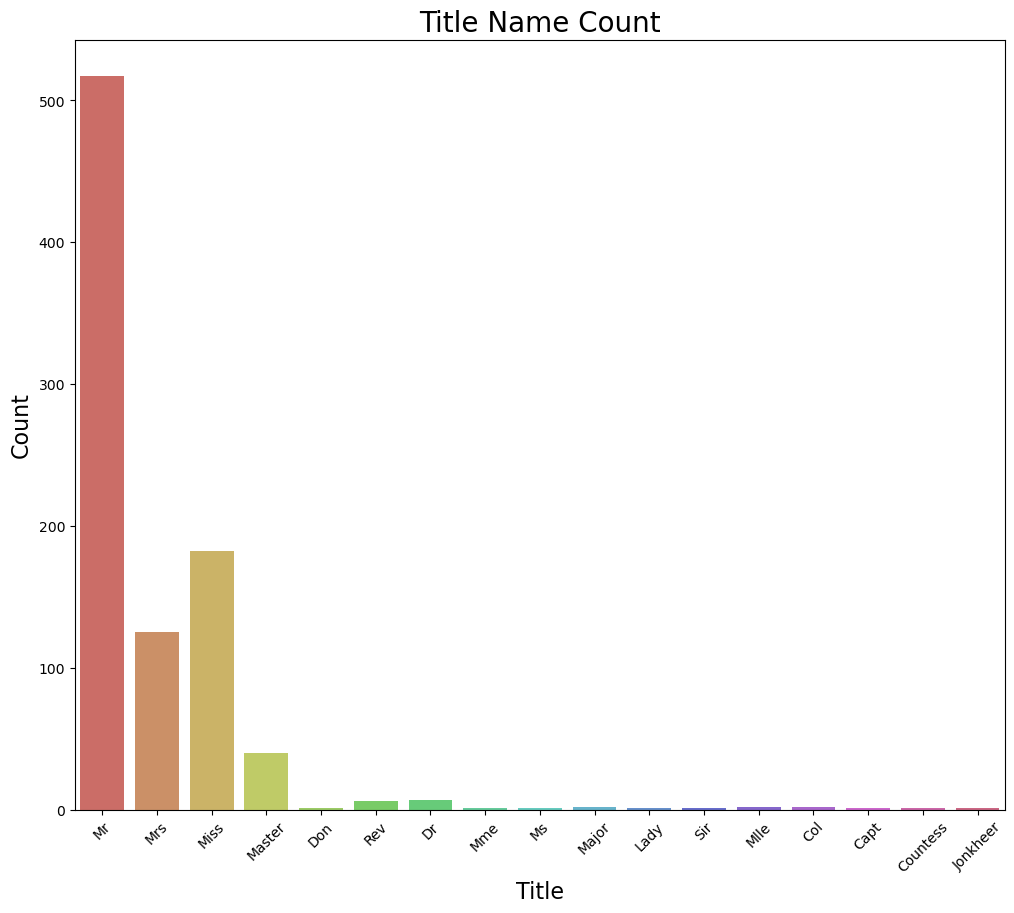

In [8]:
#Looking at the prefix of all Passengers
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,10))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

### Here we will have to use Regular Expression

# **4.1 Regular expressions:** 
### Regular expressions (regex or regexp) are a special syntax used to define patterns for searching and manipulating text. 

In [9]:
#Doing the same on df_test with regular expressions
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

## Grouping all of these titles into 6 titles and ploting the results

In [10]:
#Now, I will identify the social status of each title

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    


In [11]:
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

# Title grouped

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


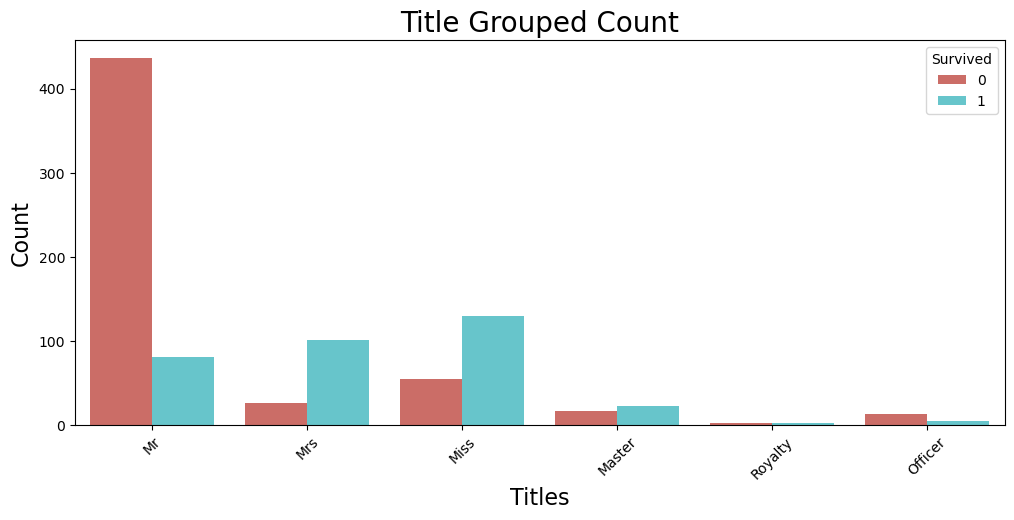

In [12]:
#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

# 4.2 Catagory to Numaric values 
Encode categorical features using one-hot encoding 

In [13]:
df = pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [14]:
# Load the Titanic data (replace 'path/to/your/file.csv' with your actual file path)
df = pd.read_csv('train.csv')

# Separate categorical and numerical features
categorical_features = ['Sex', 'Embarked']  # Add or remove features as needed
numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']

# Encode categorical features using one-hot encoding (dummy variables)
df = pd.get_dummies(df, columns=categorical_features)

# Combine categorical and numerical features
all_features = categorical_features + numerical_features

# df_filtered = df[all_features]

In [15]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   NaN      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0           A/5 21171   7.2500   NaN           0         1           0   
1            PC 17599  71.2833   C85           1         0           1   
2    STON/O2. 3101282   7.9250   NaN           1         0           0   
3              113803  53.1000  C123           1         0           0   
4              373450   8.0500   NaN           0         1           0   
..                ...      ...   ...         ...       ...         ...   
886            211536  13.0000   NaN           0         1           0   
887            112053  30.0000   B42           1         0           0   
888        W./C. 6607  23.4500   NaN           1         0           0   
889            111369  30.0000  C148           0         1           1   
890            370376   7.7500   NaN           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 15 columns]

<a id="Descriptive statistics"></a> <br> 
# **5. Descriptive statistics:** 
Descriptive statistics is a branch of statistics that focuses on summarizing and describing the key characteristics of a dataset. It provides a high-level understanding of the data without going into complex statistical analysis. 

<Figure size 1000x500 with 0 Axes>

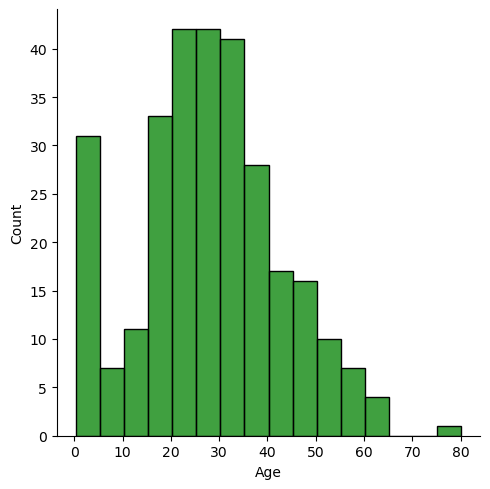

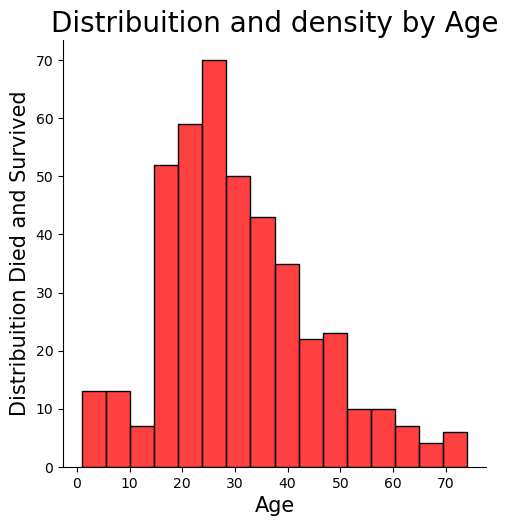

In [16]:
#First I will look my distribuition without NaN's
#I will create a df to look distribuition 
age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]
age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the two
sns.displot(age_high_zero_surv["Age"], color='g') # age_high_zero_died in green
sns.displot(age_high_zero_died["Age"], color='r') # age_high_zero_surv in red
plt.title("Distribuition and density by Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Distribuition Died and Survived",fontsize=15)
plt.show()

/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


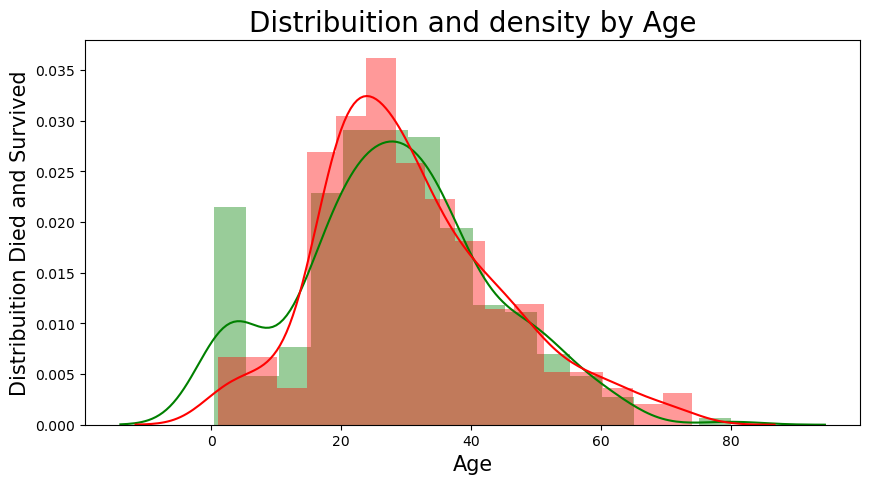

In [17]:
age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]
age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the two
sns.distplot(age_high_zero_surv["Age"], color='g') # age_high_zero_died in green
sns.distplot(age_high_zero_died["Age"], color='r') # age_high_zero_surv in red
plt.title("Distribuition and density by Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Distribuition Died and Survived",fontsize=15)
plt.show()

In [18]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

#printing the variabe that we created by median
print(age_group.median())
print(age_group.mean())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64
Sex     Pclass  Title  
female  1       Miss       29.744681
                Mrs        40.400000
                Officer    49.000000
                Royalty    48.000000
        2       Miss       22.390625
                Mrs        33.547619
        3       Miss       16.123188
                Mrs        33.515152
male    1       Master      5.306667
                Mr         41.580460
            

<br>
Description of Fare variable<br>
- Min: 0<br>
- Median: 14.45<br>
- Mean: 32.20<br>
- Max: 512.32<br> 
- Std: 49.69<br>

This might show us a better way to input the NAN's 

<b>For example: </b> an male in 2 class that is a Officer the median Age is 42. <br>
And we will use that to complete the missing data

In [19]:
#inputing the values on Age Na's 
# using the groupby to transform this variables
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

### We will try to print null values again 

In [20]:
# printing the total of nulls in Age Feature
print(df_train["Age"].isnull().sum())

0


/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


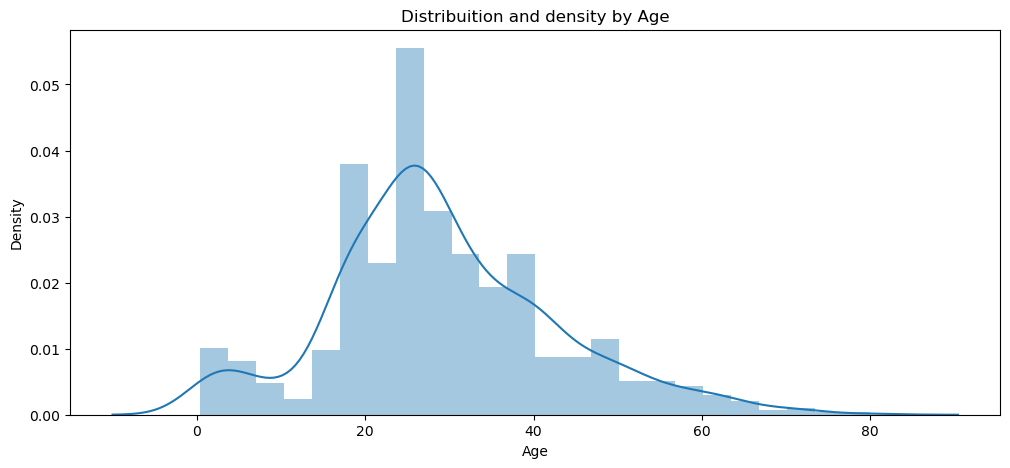

In [21]:
#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1200x500 with 0 Axes>

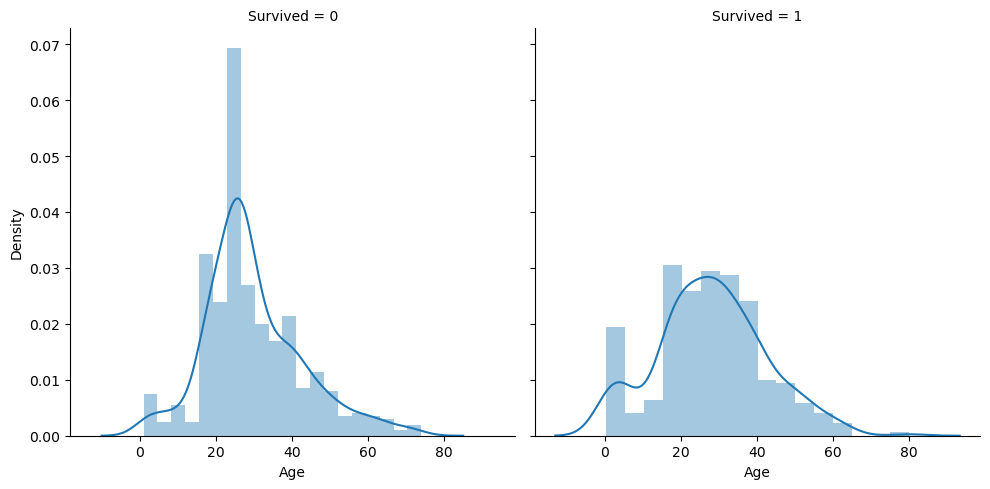

In [22]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df_train, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

Now let's categorize them 

In [23]:
#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)

# Printing the new Category
df_train["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): ['babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

In [24]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  w

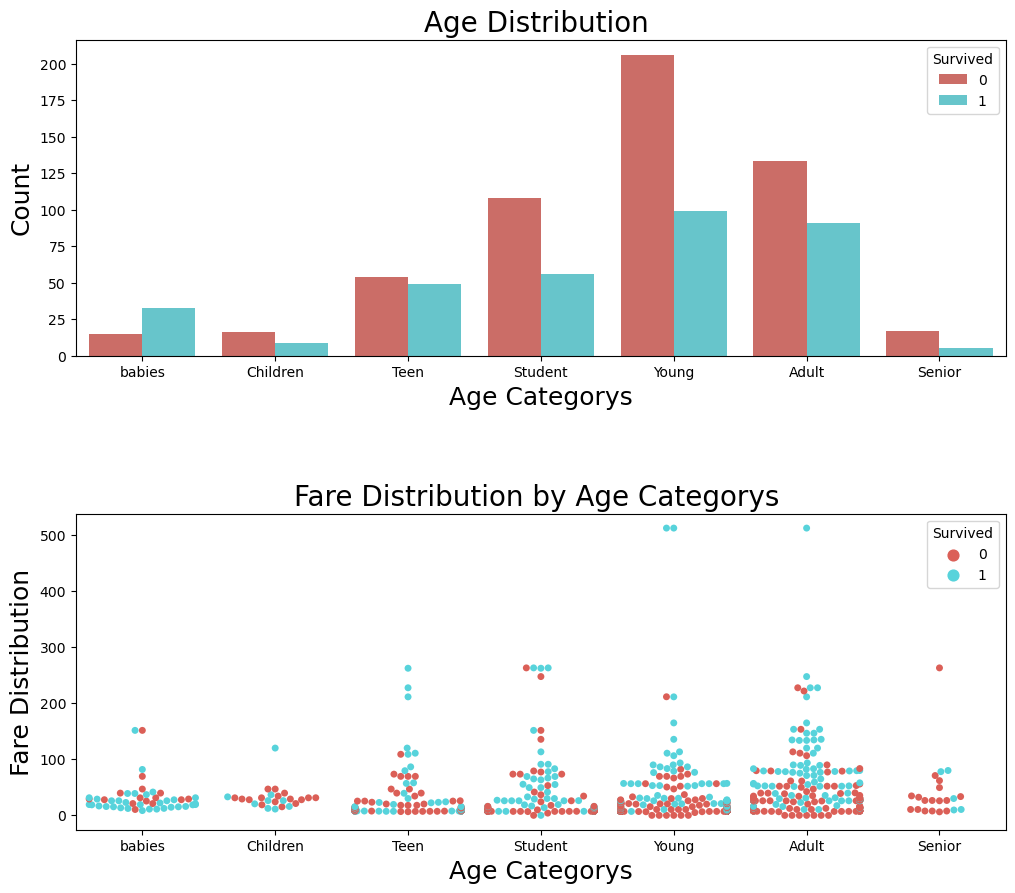

In [25]:
#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Fare Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

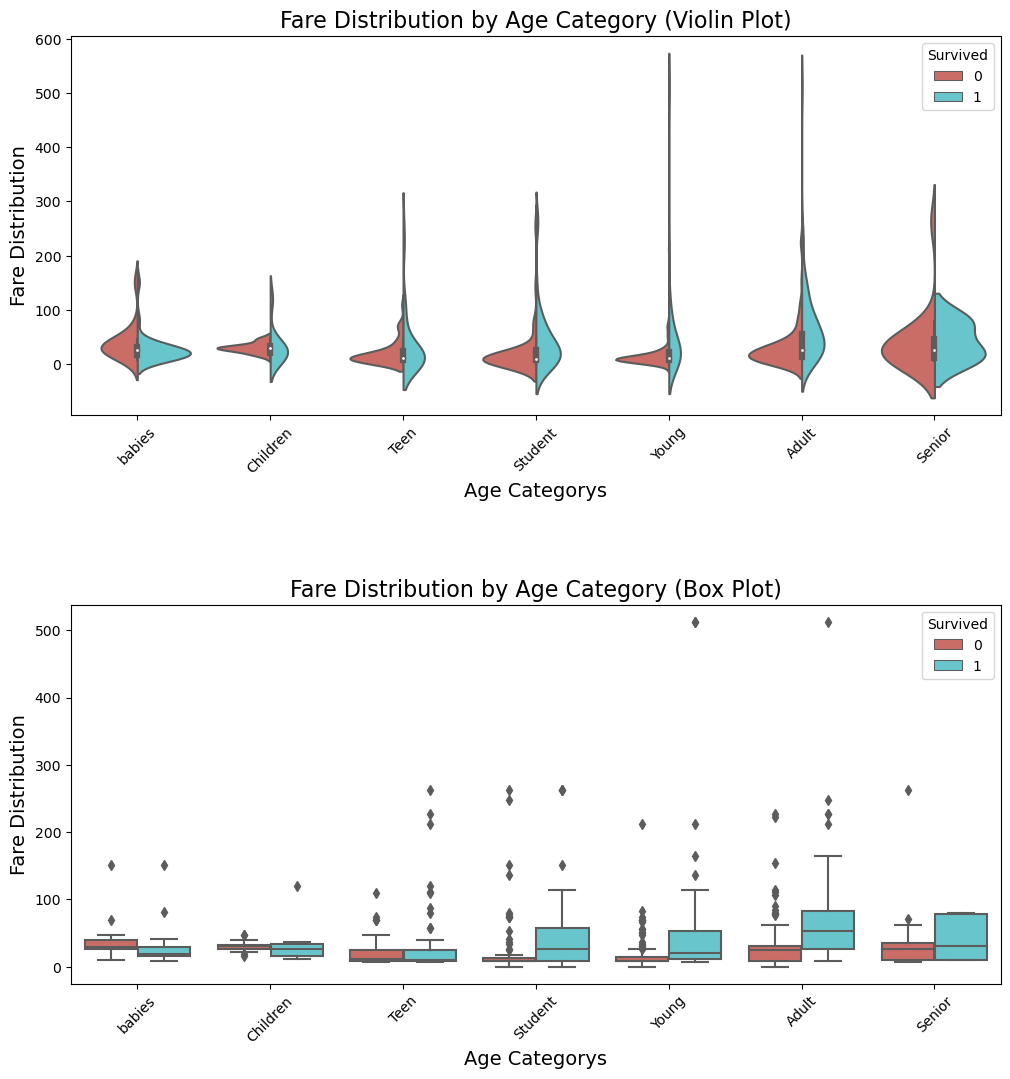

In [26]:
# Set figure size
plt.figure(figsize=(12, 12))

# Violin Plot (Age_cat vs. Fare)
plt.subplot(2, 1, 1)
sns.violinplot(x="Age_cat", y="Fare", hue="Survived", data=df_train, split=True, palette="hls")
plt.ylabel("Fare Distribution", fontsize=14)
plt.xlabel("Age Categorys", fontsize=14)
plt.title("Fare Distribution by Age Category (Violin Plot)", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Box Plot (Age_cat vs. Fare)
plt.subplot(2, 1, 2)
sns.boxplot(x="Age_cat", y="Fare", hue="Survived", data=df_train, palette="hls")
plt.ylabel("Fare Distribution", fontsize=14)
plt.xlabel("Age Categorys", fontsize=14)
plt.title("Fare Distribution by Age Category (Box Plot)", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust spacing and display the plot
plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show()

Now it look's better and clearly

### Looking the Fare distribuition to survivors and not survivors


<Figure size 1200x500 with 0 Axes>

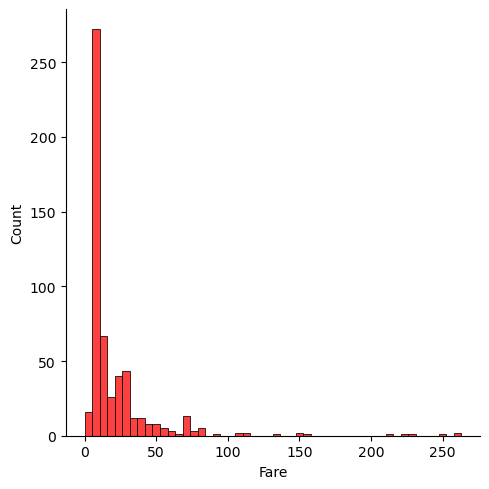

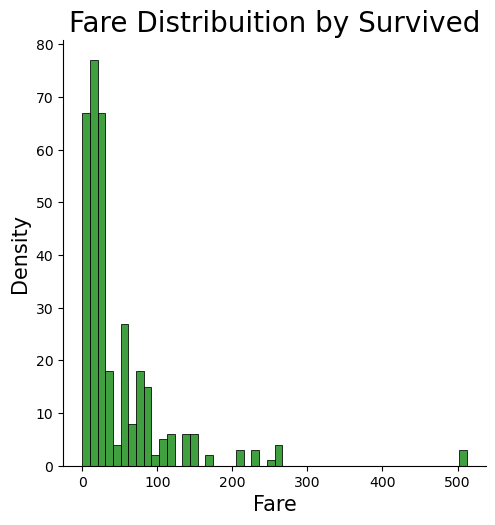

In [27]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.displot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.displot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/krishna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


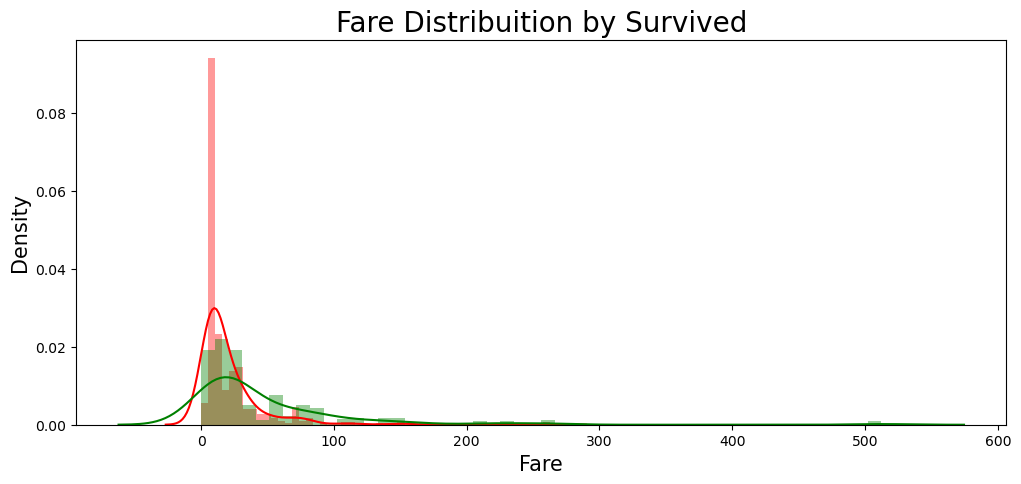

In [28]:
# now superimposing above two plots :

# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

# 6. Correlation analysis
#### Correlation analysis is a statistical technique used to measure the strength and direction of the linear relationship between two variables. It helps us understand how changes in one variable might be associated with changes in another.There are two main aspects to consider:


### 1. Strength of the Relationship:

#### Correlation coefficient: This is a numerical value typically ranging from -1 to +1 that indicates the strength of the relationship.
#### Positive correlation (+1 to 0): As the value of one variable increases, the value of the other variable tends to increase as well. (e.g., Height and weight might have a positive correlation)
#### Negative correlation (-1 to 0): As the value of one variable increases, the value of the other variable tends to decrease. (e.g., Study time and test scores might have a negative correlation)
#### Zero correlation (close to 0): There's no linear relationship between the variables. Changes in one variable are not associated with predictable changes in the other.


### 2. Direction of the Relationship:

#### The sign of the correlation coefficient (+ or -) indicates the direction of the relationship, as explained above.



            Age      Fare     Parch     SibSp
Age    1.000000  0.096067 -0.189119 -0.308247
Fare   0.096067  1.000000  0.216225  0.159651
Parch -0.189119  0.216225  1.000000  0.414838
SibSp -0.308247  0.159651  0.414838  1.000000


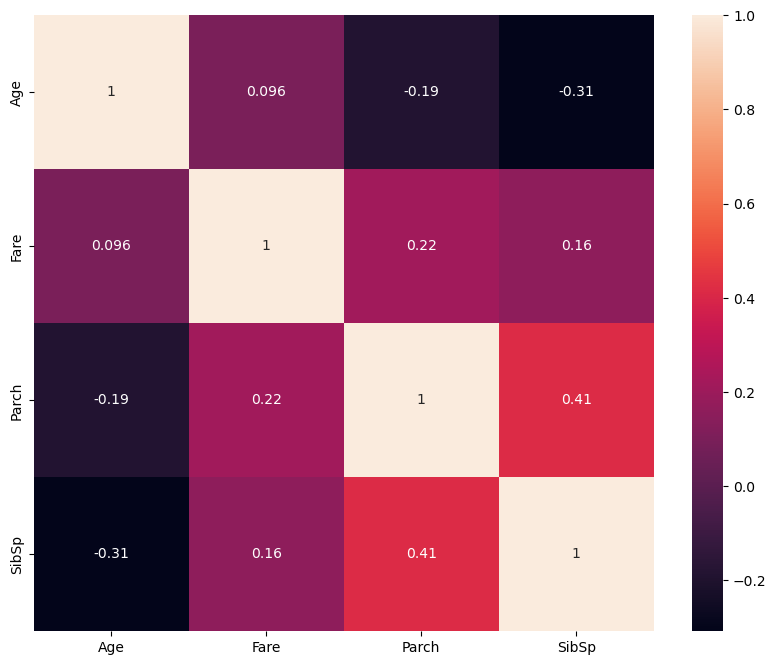

In [29]:
# Load the Titanic data (replace 'path/to/your/file.csv' with your actual file path)
df = pd.read_csv('train.csv')

# Select numerical features for correlation analysis (optional)
numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']
df_filtered = df[numerical_features]

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using seaborn
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()